In [2]:
# Export data manipulation Libraries
import pandas as pd
import numpy as np
# import data visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# import data filter warning Libraries
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data using url from github
url = 'https://raw.githubusercontent.com/deva457/SUPPLYCHAIN/refs/heads/main/SCM.csv'
df = pd.read_csv(url)
df.sample(frac = 1)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
18457,WH_118457,EID_68457,Urban,Small,East,Zone 1,4,0,4,4586,...,1,250,31.0,2019.0,13,0,B+,2,16,16074
3354,WH_103354,EID_53354,Rural,Mid,North,Zone 4,1,0,4,5255,...,0,58,37.0,NaN,24,0,A,5,26,31127
9435,WH_109435,EID_59435,Rural,Large,North,Zone 5,7,0,4,4776,...,1,245,26.0,2008.0,20,0,C,3,14,25111
19569,WH_119569,EID_69569,Rural,Large,South,Zone 5,5,0,2,3777,...,0,247,NaN,2020.0,5,0,C,2,25,6106
12210,WH_112210,EID_62210,Rural,Small,South,Zone 6,2,1,2,3469,...,1,264,26.0,NaN,23,0,A,3,2,30106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,WH_105916,EID_55916,Rural,Mid,West,Zone 4,6,0,2,5789,...,1,243,29.0,2020.0,5,1,B,2,26,6129
5745,WH_105745,EID_55745,Rural,Large,West,Zone 6,4,0,5,3793,...,1,71,17.0,2002.0,17,0,B+,2,23,21121
149,WH_100149,EID_50149,Rural,Mid,South,Zone 2,6,0,2,4114,...,0,133,24.0,2011.0,18,1,B,4,32,23135
13170,WH_113170,EID_63170,Rural,Mid,West,Zone 4,1,0,3,4718,...,0,143,32.0,NaN,12,0,C,4,11,15076


In [4]:
# checking information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [5]:
 df["workers_num"].isnull().sum() / len(df['workers_num'])*100

np.float64(3.959367945823928)

In [6]:
df['workers_num'].median()

np.float64(28.0)

In [7]:
df['workers_num'].mean()

np.float64(28.93639825130447)

In [8]:
df['workers_num'].quantile(0.75),df['workers_num'].quantile(0.25)
#whenever we imputing mean or median or by any constant value then please ensure imputation must be integer value not a decimal 

(np.float64(33.0), np.float64(24.0))

In [10]:
df['workers_num'].fillna(28,inplace = True)

In [11]:
#how to check if any null values 
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                         0
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [12]:
#separate categorical and numerical columns 
categorical_columns = df.select_dtypes(include = 'object')

In [13]:
numerical_columns = df.select_dtypes(exclude = 'object')

In [14]:
categorical_columns 

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,B


In [15]:
numerical_columns

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,3,1,2,4651,24,0,1,1,91,29.0,NaN,13,0,5,15,17115
1,0,0,4,6217,47,0,0,1,210,31.0,NaN,4,0,3,17,5074
2,1,0,4,4306,64,0,0,0,161,37.0,NaN,17,0,6,22,23137
3,7,4,2,6000,50,0,0,0,103,21.0,NaN,17,1,3,27,22115
4,3,1,2,4740,42,1,0,1,112,25.0,2009.0,18,0,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,8,1,3,5030,46,0,0,1,203,28.0,2007.0,22,1,2,4,29138
22146,3,1,3,4320,60,0,0,0,170,28.0,NaN,26,0,5,9,33108
22147,7,2,2,5268,64,0,0,0,99,22.0,NaN,20,0,6,4,24072
22148,6,2,4,4378,32,0,0,0,220,17.0,NaN,13,0,3,28,15055


In [16]:
df.drop(columns = ['Ware_house_ID','WH_Manager_ID'],axis = 1,inplace = True)

In [17]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [18]:
westzone = df[df['zone']=='West'].value_counts()

<Axes: ylabel='count'>

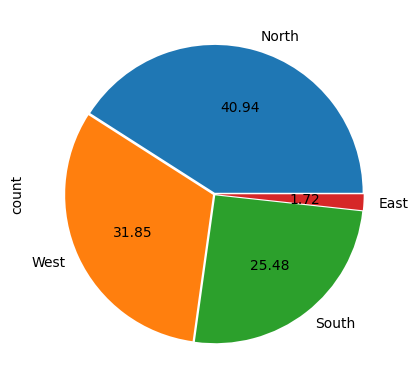

In [19]:
df['zone'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.01,0.01,0.01,0.01])